Plot the average execution time against number of threads

In [50]:
# install matplotlib
!pip install matplotlib

In [51]:
# import libraries
import matplotlib.pyplot as plt
import re

In [52]:
# Read data from final.txt file and store it in a list of dictionaries
data = []
current_case = None

with open("results/final.txt", "r") as file:
    for line in file:
        match = re.match(r"File: results/Case(\d+)/(\w+)_(\d+).txt, Average: ([\d.]+), StdDev: ([\d.]+)", line)
        if match:
            case = int(match.group(1))
            label = match.group(2)
            threads = int(match.group(3))
            average = float(match.group(4))
            
            if current_case is None or case != current_case:
                current_case = case
                data.append([])
            
            data[-1].append({
                "label": label,
                "threads": threads,
                "average": average
            })
            
data

[[{'label': 'Serial', 'threads': 1, 'average': 14027.01},
  {'label': 'Mutex', 'threads': 1, 'average': 13755.05},
  {'label': 'Mutex', 'threads': 2, 'average': 33621.37},
  {'label': 'Mutex', 'threads': 4, 'average': 29418.62},
  {'label': 'Mutex', 'threads': 8, 'average': 44666.98},
  {'label': 'rwLock', 'threads': 1, 'average': 14408.72},
  {'label': 'rwLock', 'threads': 2, 'average': 11411.18},
  {'label': 'rwLock', 'threads': 4, 'average': 7989.53},
  {'label': 'rwLock', 'threads': 8, 'average': 5398.84}],
 [{'label': 'Serial', 'threads': 1, 'average': 13510.66},
  {'label': 'Mutex', 'threads': 1, 'average': 13825.78},
  {'label': 'Mutex', 'threads': 2, 'average': 33912.24},
  {'label': 'Mutex', 'threads': 4, 'average': 32094.92},
  {'label': 'Mutex', 'threads': 8, 'average': 43962.81},
  {'label': 'rwLock', 'threads': 1, 'average': 13874.7},
  {'label': 'rwLock', 'threads': 2, 'average': 16994.99},
  {'label': 'rwLock', 'threads': 4, 'average': 11206.32},
  {'label': 'rwLock', 't

In [53]:
# Graph titles
case_titles = [
    "Case 1 (n = 1,000, m = 10,000, mMember = 0.99, mInsert = 0.005, mDelete = 0.005)",
    "Case 2 (n = 1,000, m = 10,000, mMember = 0.90, mInsert = 0.05, mDelete = 0.05)",
    "Case 3 (n = 1,000, m = 10,000, mMember = 0.50, mInsert = 0.25, mDelete = 0.25)",
]

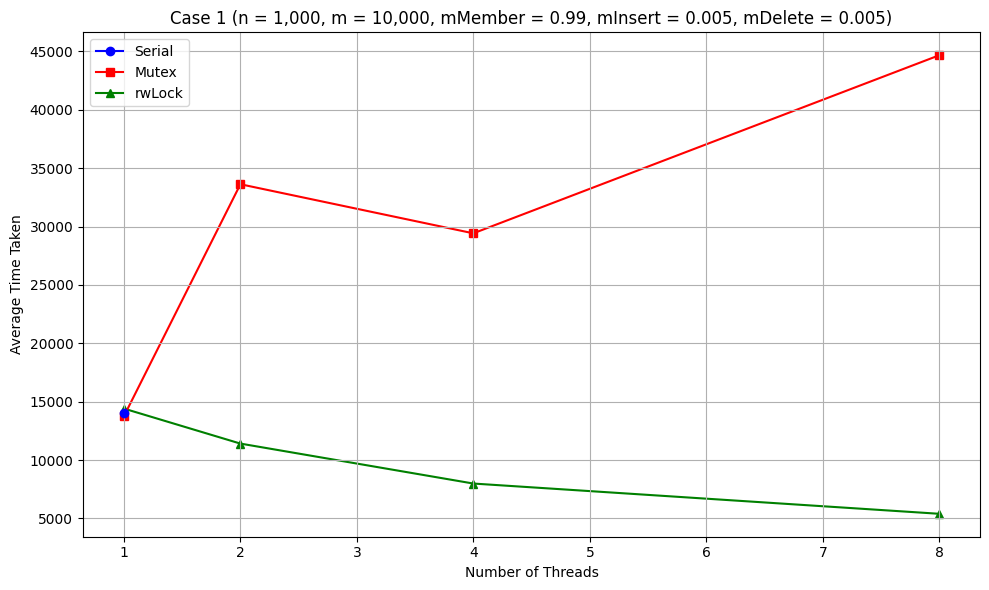

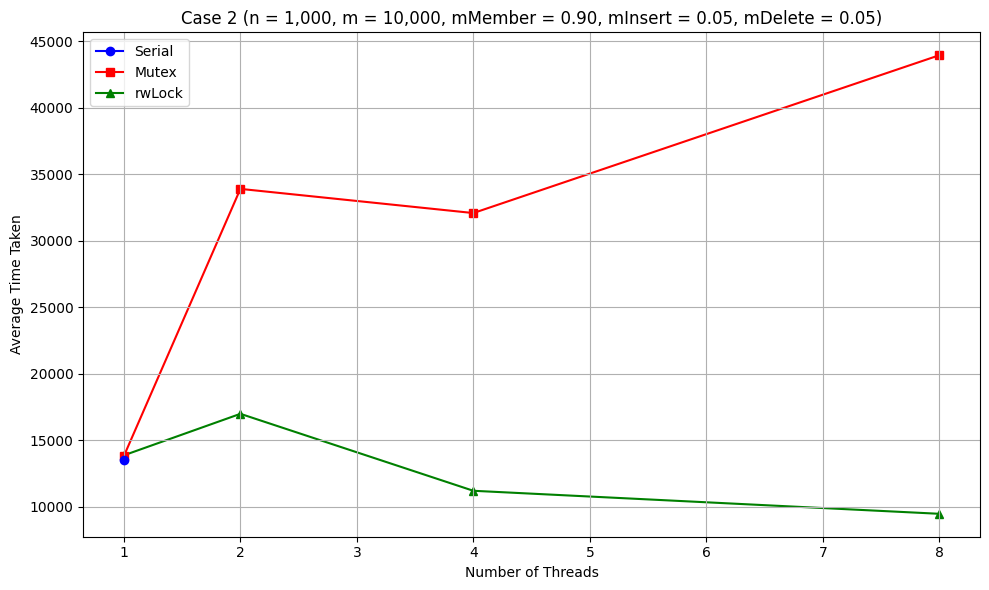

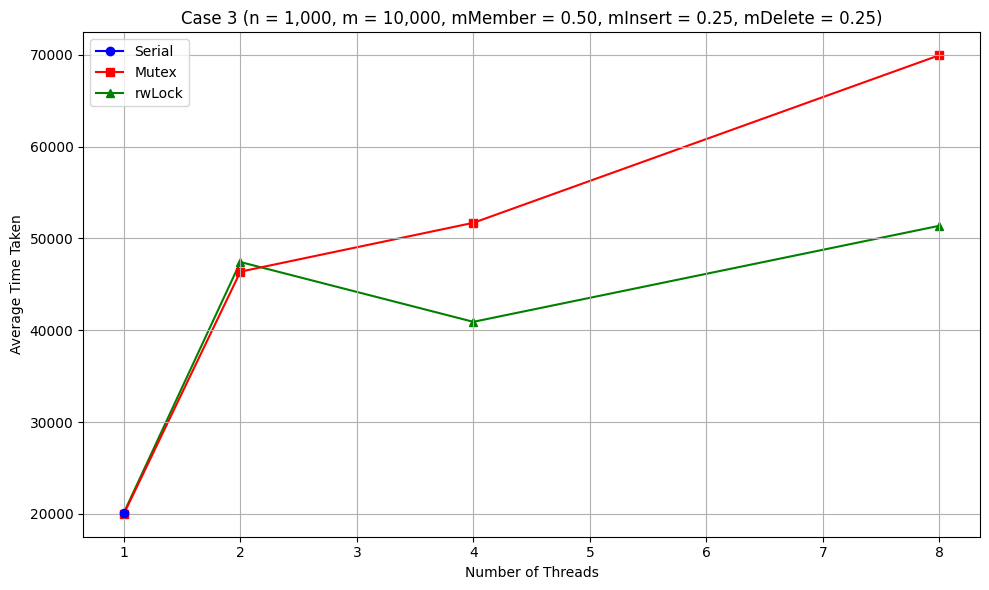

In [54]:
# Iterate through data and create separate graphs for each case
for i, case_data in enumerate(data):
    plt.figure(figsize=(10, 6))
    
    serial_threads = []
    serial_average = []
    mutex_threads = []
    mutex_average = []
    rwlock_threads = []
    rwlock_average = []
    
    for entry in case_data:
        label = entry["label"]
        threads = entry["threads"]
        average = entry["average"]
        
        # Separate data by label
        if label == "Serial":
            serial_threads.append(threads)
            serial_average.append(average)
        elif label == "Mutex":
            mutex_threads.append(threads)
            mutex_average.append(average)
        elif label == "rwLock":
            rwlock_threads.append(threads)
            rwlock_average.append(average)
    
    # Plot the data for each label with different colors
    if serial_threads:
        plt.plot(serial_threads, serial_average, marker="o", linestyle="-", label="Serial", color="blue", zorder=2)
    if mutex_threads:
        plt.plot(mutex_threads, mutex_average, marker="s", linestyle="-", label="Mutex", color="red", zorder=1)
    if rwlock_threads:
        plt.plot(rwlock_threads, rwlock_average, marker="^", linestyle="-", label="rwLock", color="green", zorder=0)
    
    # Set axis labels and title
    plt.xlabel("Number of Threads")
    plt.ylabel("Average Time Taken")
    plt.title(case_titles[i])
    
    # Add a legend
    plt.legend()
    
    # Add gridlines
    plt.grid(True)

    # Show the graph
    plt.tight_layout()
    plt.show()